**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score
)
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import (
    BaggingRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    StackingRegressor,
    AdaBoostRegressor
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.pipeline import Pipeline
import joblib

**Dataset without groups and times**

In [2]:
file_path = "./dataset_without_groups_and_time.xlsx"
grade_interval = 15

data_first_to_five = pd.read_excel(file_path)
data_first_to_six = pd.read_excel(file_path)

XFive = data_first_to_five.drop(columns=['Final_Exam', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Sixth_Weekly_Exam','Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
YFive = data_first_to_five['Final_Exam']

XSix = data_first_to_six.drop(columns=['Final_Exam', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
YSix = data_first_to_six['Final_Exam']

print(XFive)
print(XSix)

print(YFive)
print(YSix)

XFive_train, XFive_test, YFive_train, YFive_test = train_test_split(XFive, YFive, test_size=0.2, random_state=42)
XSix_train, XSix_test, YSix_train, YSix_test = train_test_split(XSix, YSix, test_size=0.2, random_state=42)

      First_Weekly_Exam  Second_Weekly_Exam  Third_Weekly_Exam  \
0                   2.0                 2.0                2.0   
1                   1.0                 2.0                1.0   
2                   2.0                 1.8                2.0   
3                   2.0                 2.0                2.0   
4                   2.0                 2.0                2.0   
...                 ...                 ...                ...   
1376                1.0                 2.0                2.0   
1377                2.0                 2.0                2.0   
1378                2.0                 2.0                1.0   
1379                2.0                 1.5                2.0   
1380                2.0                 2.0                2.0   

      Fourth_Weekly_Exam  Fifth_Weekly_Exam  Assignment  
0                    1.0                2.0        29.5  
1                    2.0                2.0        29.5  
2                    1.7         

**Dataset with groups and times**

In [ ]:
file_path = "./dataset_with_groups_and_time.xlsx"
grade_interval = 15
data_first_to_five = pd.read_excel(file_path)
data_first_to_six = pd.read_excel(file_path)

XFive = data_first_to_five.drop(columns=['Final_Exam', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Sixth_Weekly_Exam','Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
YFive = data_first_to_five['Final_Exam']

XSix = data_first_to_six.drop(columns=['Final_Exam', 'Bonus_Weekly_Exam_Retake', 'AnonymId', 'Seventh_Weekly_Exam','Eighth_Weekly_Exam','Ninth_Weekly_Exam', 'Tenth_Weekly_Exam'])
YSix = data_first_to_six['Final_Exam']

print(XFive)
print(XSix)

print(YFive)
print(YSix)

XFive_train, XFive_test, YFive_train, YFive_test = train_test_split(XFive, YFive, test_size=0.2, random_state=42)
XSix_train, XSix_test, YSix_train, YSix_test = train_test_split(XSix, YSix, test_size=0.2, random_state=42)

**Subject-Based Classifier**

In [3]:
def classify_grade_base(score, max_score=50, interval=15):
    excellent_threshold = max_score * 0.85  # 42.5
    good_threshold = max_score * 0.7        # 35
    medium_threshold = max_score * 0.55     # 27.5
    sufficient_threshold = max_score * 0.4  # 20

    if score > excellent_threshold:
        return "EXCELLENT"
    elif good_threshold < score <= excellent_threshold:
        return "GOOD"
    elif medium_threshold < score <= good_threshold:
        return "AVERAGE"
    elif sufficient_threshold < score <= medium_threshold:
        return "SATISFACTORY"
    else:
        return "FAIL"

#test_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
#results = {score: classify_grade_base(score) for score in test_scores}
#print(results)

**Performance-Tiered Classifier**

In [ ]:
def classify_grade(score, max_score=50):
    high_threshold = max_score * 0.6  # Top 60% and above
    medium_threshold = max_score * 0.4  # Middle 30-60%

    if score >= high_threshold:
        return "HIGH"
    elif score >= medium_threshold:
        return "AVERAGE"
    else:
        return "LOW"

#test_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
#results = {score: classify_grade(score) for score in test_scores}
#print(results)

**Buffer-Zone Classifier**

In [ ]:
def classify_grade(score, max_score=50, interval=15, buffer=0.06):
    # Define grade thresholds
    excellent_threshold = max_score * 0.85
    good_threshold = max_score * 0.7
    medium_threshold = max_score * 0.55
    sufficient_threshold = max_score * 0.4

    buffer_zone = max_score * buffer

    # Apply grading logic with buffer zones
    if score > excellent_threshold or (excellent_threshold - buffer_zone) <= score:
        return "EXCELLENT"
    elif good_threshold < score <= excellent_threshold or (good_threshold - buffer_zone) <= score < excellent_threshold:
        return "GOOD"
    elif medium_threshold < score <= good_threshold or (medium_threshold - buffer_zone) <= score < good_threshold:
        return "AVERAGE"
    elif sufficient_threshold < score <= medium_threshold or (sufficient_threshold - buffer_zone) <= score < medium_threshold:
        return "SATISFACTORY"
    else:
        return "FAIL"

#test_scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
#results = {score: classify_grade(score) for score in test_scores}
#print(results)

**Metrics calculation**

In [4]:
def calculate_metrics(y_test, y_pred):
    test_grades = y_test.apply(lambda x: classify_grade_base(x))
    actual_grades = pd.Series(y_pred).apply(lambda x: classify_grade_base(x))
    metrics = {
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Accuracy": accuracy_score(test_grades,actual_grades)
    }
    return metrics

**Plot generation**

In [5]:
def generate_metrics_comparison(rf_five_values, rf_six_values, title):
    metrics = ['MSE', 'RMSE', 'MAE', 'R²']
    x = np.arange(len(metrics))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, rf_five_values, width, label='Model (5 weekly exams)', color='blue')
    bars2 = ax.bar(x + width/2, rf_six_values, width, label='Model (6 weekly exams)', color='orange')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def generate_confusion_matrices(y_pred_five, y_pred_six):
    YFive_test_grades = YFive_test.apply(lambda x: classify_grade_base(x))
    YSix_test_grades = YSix_test.apply(lambda x: classify_grade_base(x))
    y_pred_five_grades = pd.Series(y_pred_five).apply(lambda x: classify_grade_base(x))
    y_pred_six_grades = pd.Series(y_pred_six).apply(lambda x: classify_grade_base(x))

    confusion_five = confusion_matrix(YFive_test_grades, y_pred_five_grades, labels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'])
    confusion_six = confusion_matrix(YSix_test_grades, y_pred_six_grades, labels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'])

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    sns.heatmap(confusion_five, annot=True, fmt='d', cmap='Blues',
                xticklabels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'],
                yticklabels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'], ax=axes[0])
    axes[0].set_title("Model (5 weekly exams)")
    axes[0].set_xlabel("Predicted Grade")
    axes[0].set_ylabel("Actual Grade")

    sns.heatmap(confusion_six, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'],
                yticklabels=['FAIL', 'SUFFICIENT', 'MEDIUM', 'GOOD', 'EXCELLENT'], ax=axes[1])
    axes[1].set_title("Model (6 weekly exams)")
    axes[1].set_xlabel("Predicted Grade")
    axes[1].set_ylabel("Actual Grade")

    plt.tight_layout()
    plt.show()

"""def generate_confusion_matrices(y_pred_five, y_pred_six):
    YFive_test_grades = YFive_test.apply(lambda x: classify_grade(x))
    YSix_test_grades = YSix_test.apply(lambda x: classify_grade(x))
    y_pred_five_grades = pd.Series(y_pred_five).apply(lambda x: classify_grade(x))
    y_pred_six_grades = pd.Series(y_pred_six).apply(lambda x: classify_grade(x))

    confusion_five = confusion_matrix(YFive_test_grades, y_pred_five_grades, labels=['LOW', 'MEDIUM', 'HIGH'])
    confusion_six = confusion_matrix(YSix_test_grades, y_pred_six_grades, labels=['LOW', 'MEDIUM', 'HIGH'])

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    sns.heatmap(confusion_five, annot=True, fmt='d', cmap='Blues',
                xticklabels=['LOW', 'MEDIUM', 'HIGH'],
                yticklabels=['LOW', 'MEDIUM', 'HIGH'], ax=axes[0])
    axes[0].set_title("Model (5 weekly exams)")
    axes[0].set_xlabel("Predicted Grade")
    axes[0].set_ylabel("Actual Grade")

    sns.heatmap(confusion_six, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['LOW', 'MEDIUM', 'HIGH'],
                yticklabels=['LOW', 'MEDIUM', 'HIGH'], ax=axes[1])
    axes[1].set_title("Model (6 weekly exams)")
    axes[1].set_xlabel("Predicted Grade")
    axes[1].set_ylabel("Actual Grade")

    plt.tight_layout()
    plt.show()"""

def generate_predicted_vs_actual_comparison(YFive_test, y_pred_rf_five, YSix_test, y_pred_rf_six, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(YFive_test, y_pred_rf_five, alpha=0.6, color='blue', label='Model (5 weekly exams)')
    plt.scatter(YSix_test, y_pred_rf_six, alpha=0.6, color='orange', label='Model (6 weekly exams)')
    plt.plot([min(YFive_test), max(YFive_test)], [min(YFive_test), max(YFive_test)], color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def generate_accuracy_comparison(accuracy_five, accuracy_six, title):
    models = ['Model (5 weekly exams)', 'Model (6 weekly exams)']
    accuracies = [accuracy_five, accuracy_six]

    plt.figure(figsize=(8, 6))
    plt.bar(models, accuracies, color=['blue', 'orange'])
    plt.ylim(0, 1)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(title)

    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f"{acc:.2%}", ha='center', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

**Simple SVM**

In [6]:
svm_pipeline_five = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

svm_pipeline_six = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

svm_pipeline_five.fit(XFive_train, YFive_train)
svm_pipeline_six.fit(XSix_train, YSix_train)

y_pred_svm_five = svm_pipeline_five.predict(XFive_test)
y_pred_svm_six = svm_pipeline_six.predict(XSix_test)

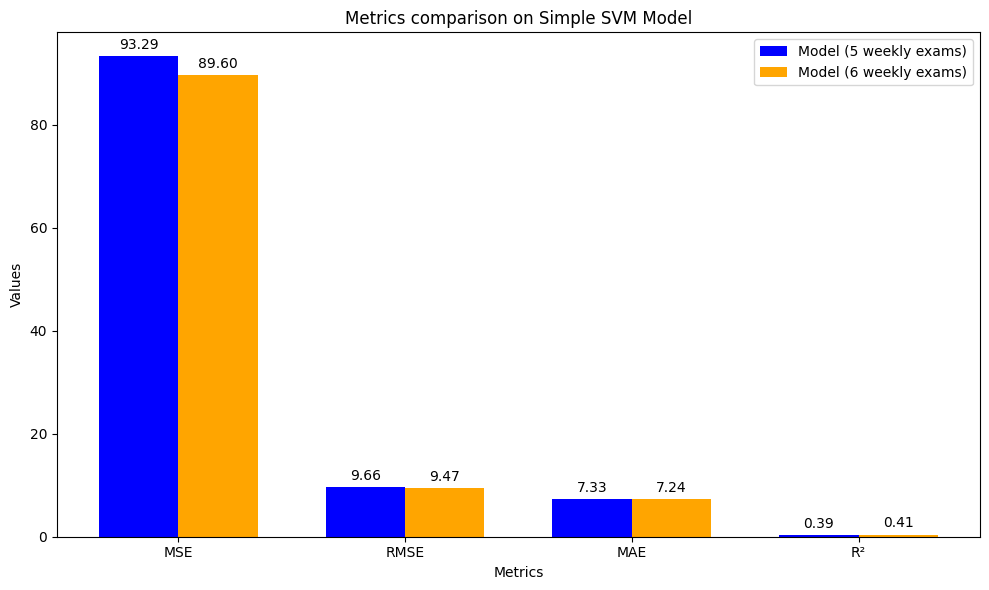

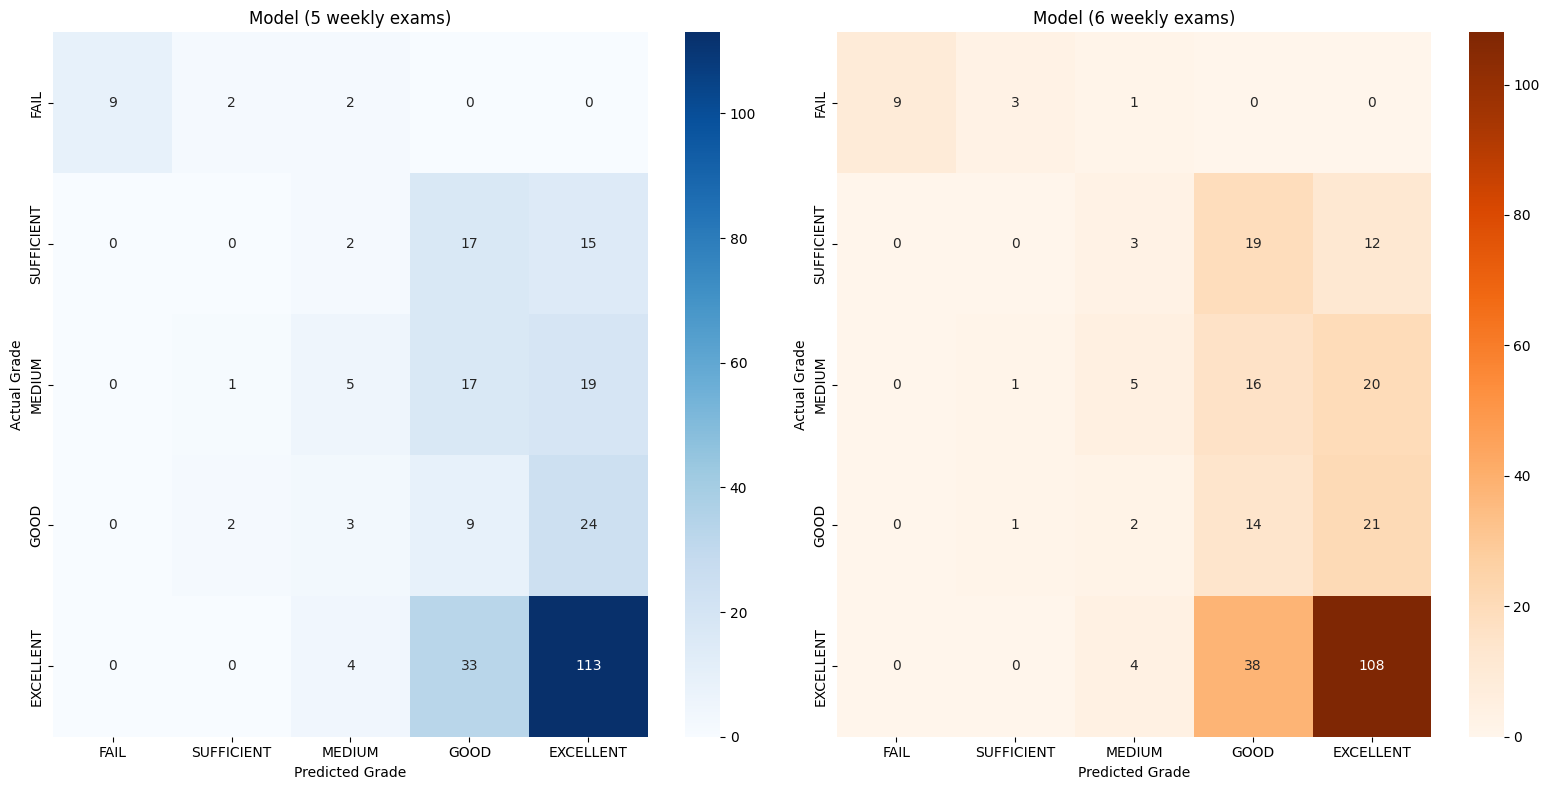

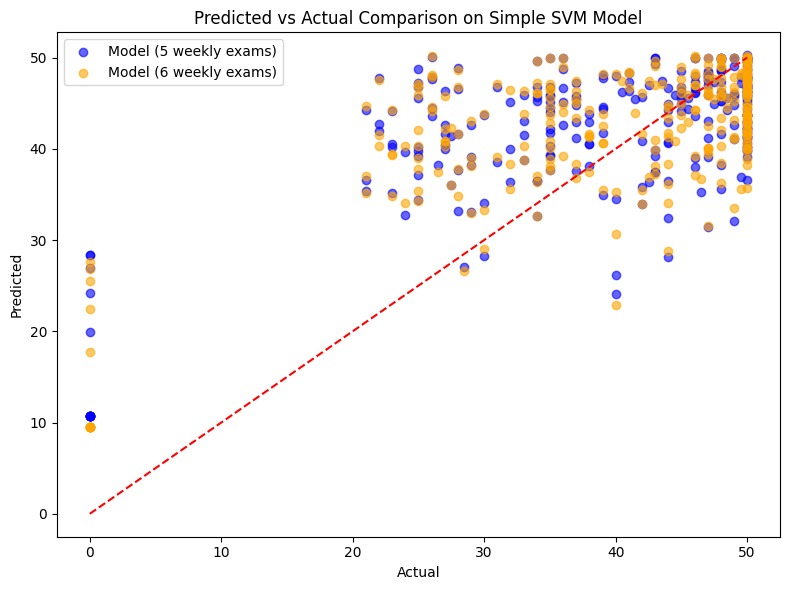

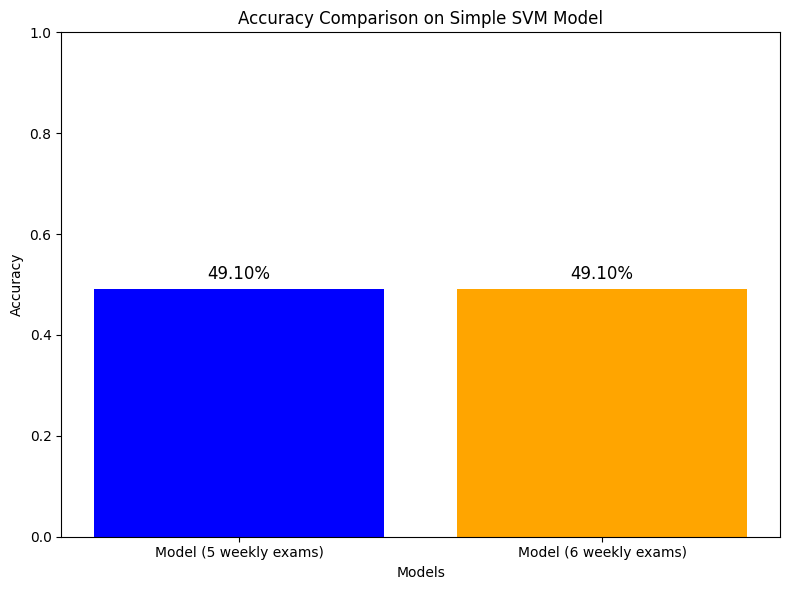

In [7]:
# Metrics calculation
metrics_five = calculate_metrics(YFive_test, y_pred_svm_five)
metrics_six = calculate_metrics(YSix_test, y_pred_svm_six)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
svm_five_values = [metrics_five["MSE"], metrics_five["RMSE"], metrics_five["MAE"], metrics_five["R2"]]
svm_six_values = [metrics_six["MSE"], metrics_six["RMSE"], metrics_six["MAE"], metrics_six["R2"]]

# Plots
generate_metrics_comparison(svm_five_values, svm_six_values,"Metrics comparison on Simple SVM Model")
generate_confusion_matrices(y_pred_svm_five, y_pred_svm_six)
generate_predicted_vs_actual_comparison(YFive_test, y_pred_svm_five, YSix_test, y_pred_svm_six, "Predicted vs Actual Comparison on Simple SVM Model")
generate_accuracy_comparison(metrics_five["Accuracy"], metrics_six["Accuracy"], "Accuracy Comparison on Simple SVM Model")

**Weighted SVM**

In [ ]:
# Define assignment weight and calculate weights for other features
assignment_weight = 50  # 50% weight for assignments
remaining_weight_five = (100 - assignment_weight) / (XFive_train.shape[1] - 1)
remaining_weight_six = (100 - assignment_weight) / (XSix_train.shape[1] - 1)

# Feature weights for 5 exams
weights_per_feature_five = np.ones(XFive_train.shape[1]) * remaining_weight_five
weights_per_feature_five[XFive_train.columns.get_loc('assignment')] = assignment_weight

# Feature weights for 6 exams
weights_per_feature_six = np.ones(XSix_train.shape[1]) * remaining_weight_six
weights_per_feature_six[XSix_train.columns.get_loc('assignment')] = assignment_weight

# Apply the feature weights to all the samples
sample_weights_five = np.prod([
    np.where(XFive_train.iloc[:, i].notnull(), weights_per_feature_five[i], 1)
    for i in range(XFive_train.shape[1])
], axis=0)

sample_weights_six = np.prod([
    np.where(XSix_train.iloc[:, i].notnull(), weights_per_feature_six[i], 1)
    for i in range(XSix_train.shape[1])
], axis=0)

# Weighted SVM for 5 exams
weighted_svm_five = SVR(kernel='rbf', C=1.0)
weighted_svm_five.fit(XFive_train, YFive_train, sample_weight=sample_weights_five)
y_pred_weighted_five = weighted_svm_five.predict(XFive_test)

# Weighted SVM for 6 exams
weighted_svm_six = SVR(kernel='rbf', C=1.0)
weighted_svm_six.fit(XSix_train, YSix_train, sample_weight=sample_weights_six)
y_pred_weighted_six = weighted_svm_six.predict(XSix_test)

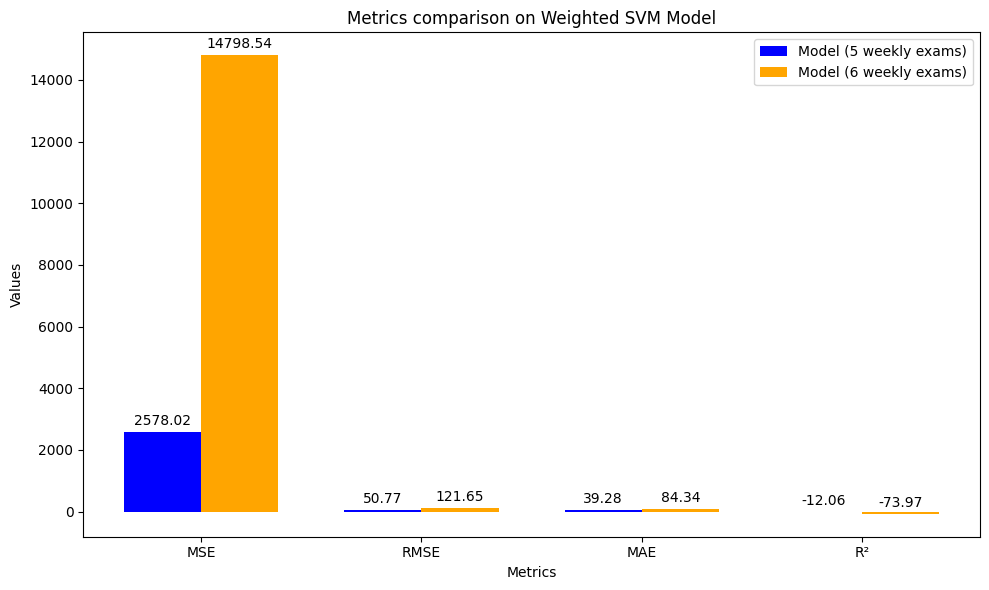

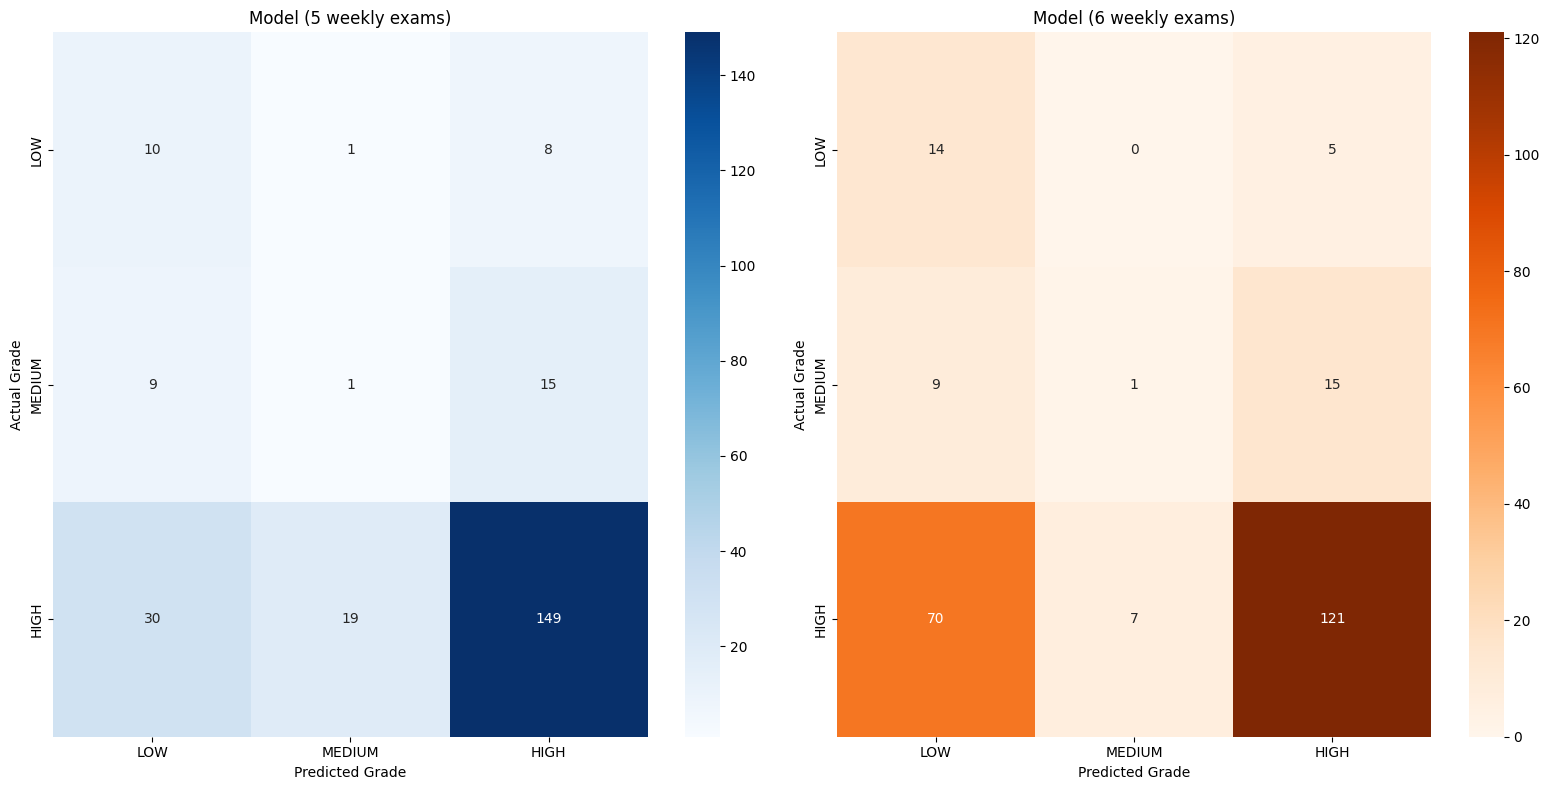

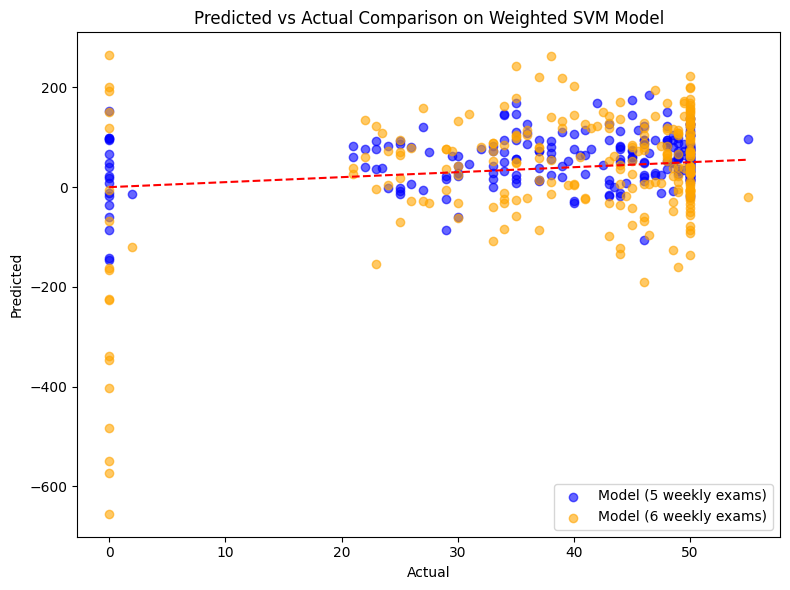

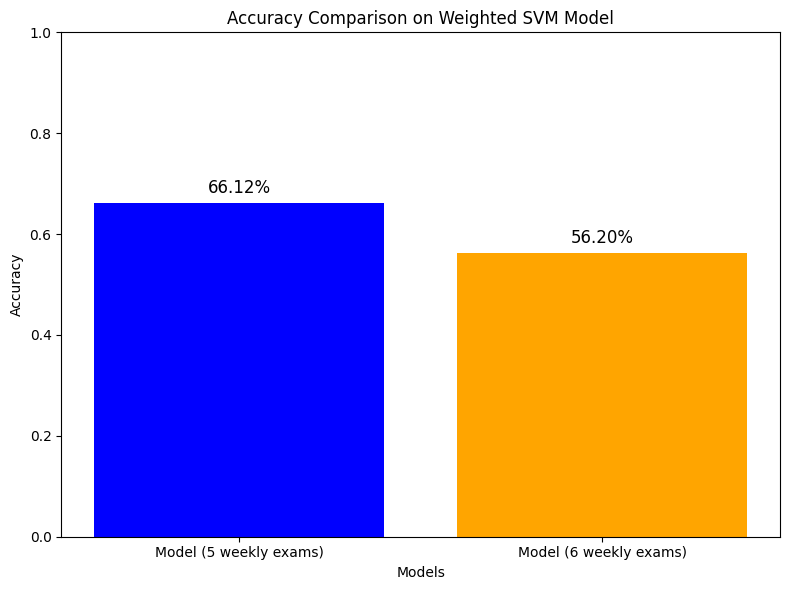

In [ ]:
# Metrics calculation
metrics_five_weighted = calculate_metrics(YFive_test, y_pred_weighted_five)
metrics_six_weighted = calculate_metrics(YSix_test, y_pred_weighted_six)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
svm_weighted_five_values = [metrics_five_weighted["MSE"], metrics_five_weighted["RMSE"], metrics_five_weighted["MAE"], metrics_five_weighted["R2"]]
svm_weighted_six_values = [metrics_six_weighted["MSE"], metrics_six_weighted["RMSE"], metrics_six_weighted["MAE"], metrics_six_weighted["R2"]]

# Plots
generate_metrics_comparison(svm_weighted_five_values, svm_weighted_six_values,"Metrics comparison on Weighted SVM Model")
generate_confusion_matrices(y_pred_weighted_five, y_pred_weighted_six)
generate_predicted_vs_actual_comparison(YFive_test, y_pred_weighted_five, YSix_test, y_pred_weighted_six, "Predicted vs Actual Comparison on Weighted SVM Model")
generate_accuracy_comparison(metrics_five_weighted["Accuracy"], metrics_six_weighted["Accuracy"], "Accuracy Comparison on Weighted SVM Model")

**SVM with best parameters**

In [ ]:
# Define parameter grid for GridSearchCV
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10],
    'gamma': ['scale'],
}

# Grid search for 5 exams
grid_search_svm_five = GridSearchCV(estimator=SVR(), param_grid=param_grid_svm, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search_svm_five.fit(XFive_train, YFive_train)
best_svm_five = grid_search_svm_five.best_estimator_

# Grid search for 6 exams
grid_search_svm_six = GridSearchCV(estimator=SVR(), param_grid=param_grid_svm, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search_svm_six.fit(XSix_train, YSix_train)
best_svm_six = grid_search_svm_six.best_estimator_

# Predictions
y_pred_svm_five_best = best_svm_five.predict(XFive_test)
y_pred_svm_six_best = best_svm_six.predict(XSix_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


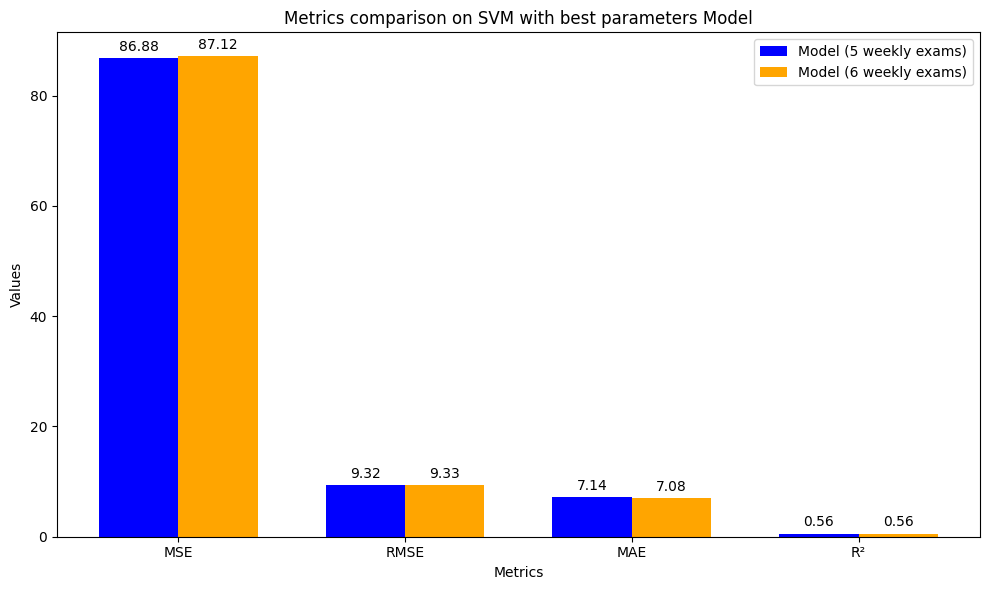

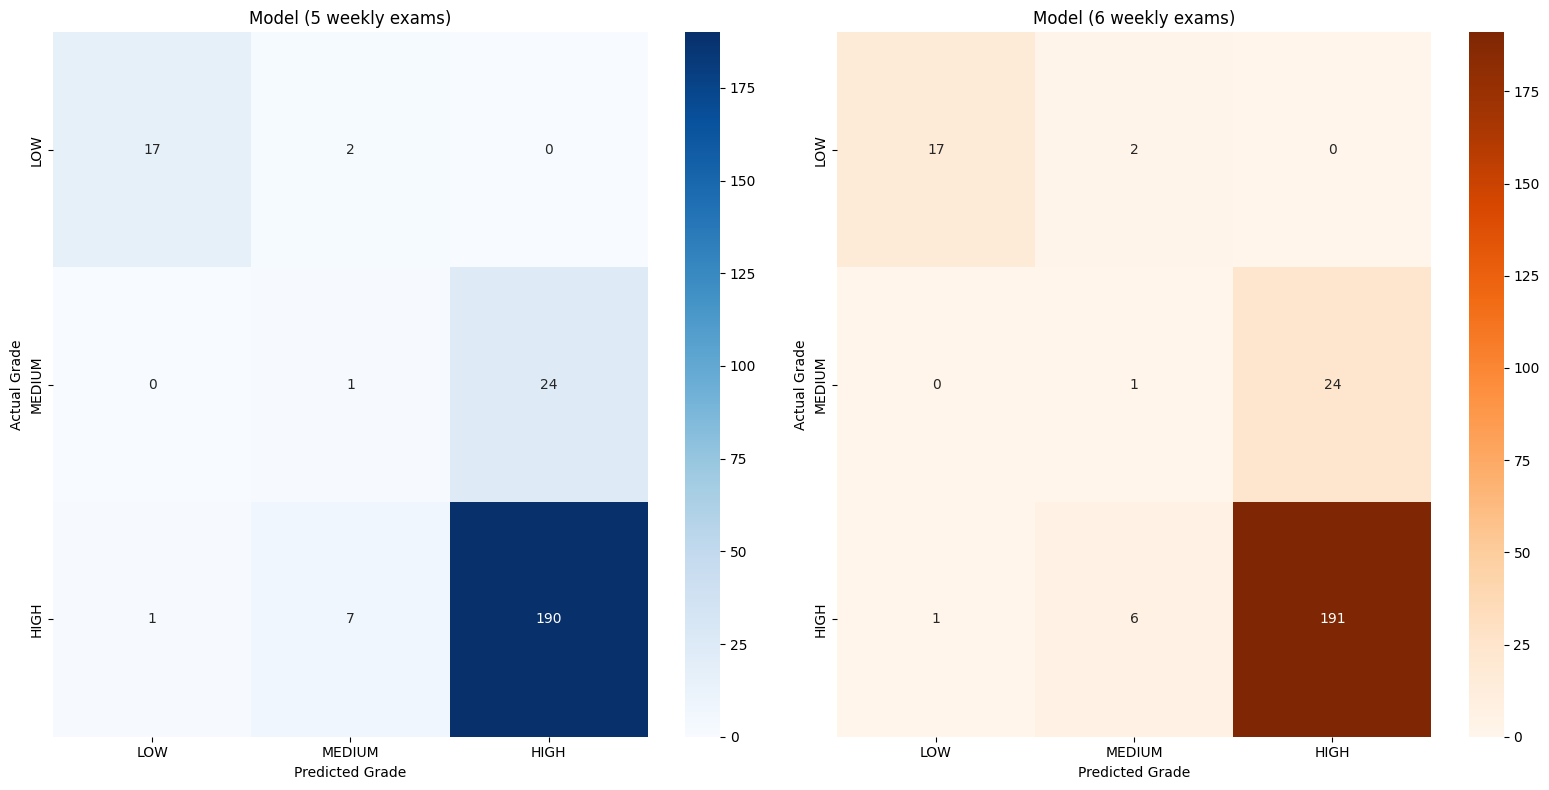

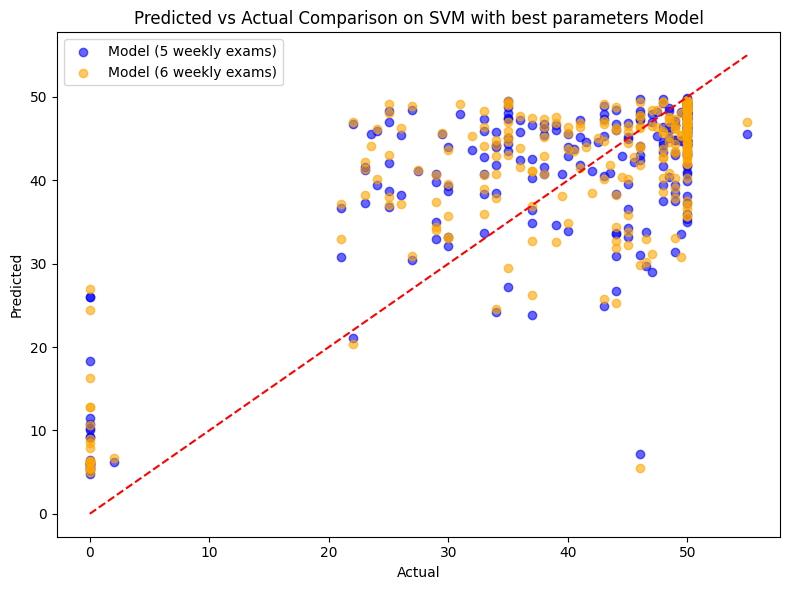

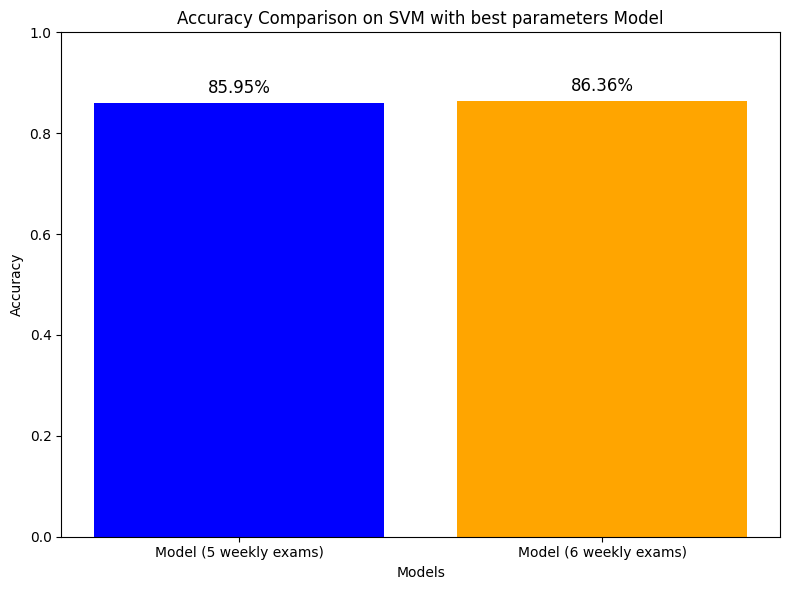

In [ ]:
# Metrics calculation
metrics_five_best = calculate_metrics(YFive_test, y_pred_svm_five_best)
metrics_six_best = calculate_metrics(YSix_test, y_pred_svm_six_best)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
svm_best_five_values = [metrics_five_best["MSE"], metrics_five_best["RMSE"], metrics_five_best["MAE"], metrics_five_best["R2"]]
svm_best_six_values = [metrics_six_best["MSE"], metrics_six_best["RMSE"], metrics_six_best["MAE"], metrics_six_best["R2"]]

# Plots
generate_metrics_comparison(svm_best_five_values, svm_best_six_values,"Metrics comparison on SVM with best parameters Model")
generate_confusion_matrices(y_pred_svm_five_best, y_pred_svm_six_best)
generate_predicted_vs_actual_comparison(YFive_test, y_pred_svm_five_best, YSix_test, y_pred_svm_six_best, "Predicted vs Actual Comparison on SVM with best parameters Model")
generate_accuracy_comparison(metrics_five_best["Accuracy"], metrics_six_best["Accuracy"], "Accuracy Comparison on SVM with best parameters Model")

**Bagging SVM**

In [ ]:
base_svm = SVR(kernel='rbf', C=1, gamma='scale')

# Bagged model for 5 exams
bagged_svm_five = BaggingRegressor(
    estimator=base_svm,
    n_estimators=50,
    random_state=42,
    n_jobs=-1,
    verbose=2
)
bagged_svm_five.fit(XFive_train, YFive_train)
y_pred_bagged_svm_five = bagged_svm_five.predict(XFive_test)

# Bagged model for 6 exams
bagged_svm_six = BaggingRegressor(
    estimator=base_svm,
    n_estimators=50,
    random_state=42,
    n_jobs=-1,
    verbose=2
)
bagged_svm_six.fit(XSix_train, YSix_train)
y_pred_bagged_svm_six = bagged_svm_six.predict(XSix_test)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


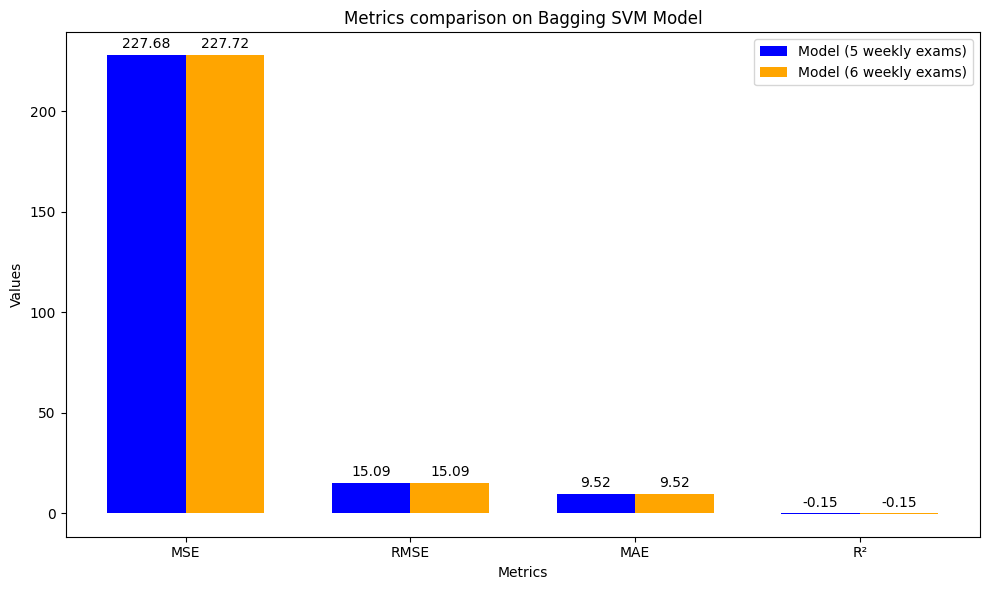

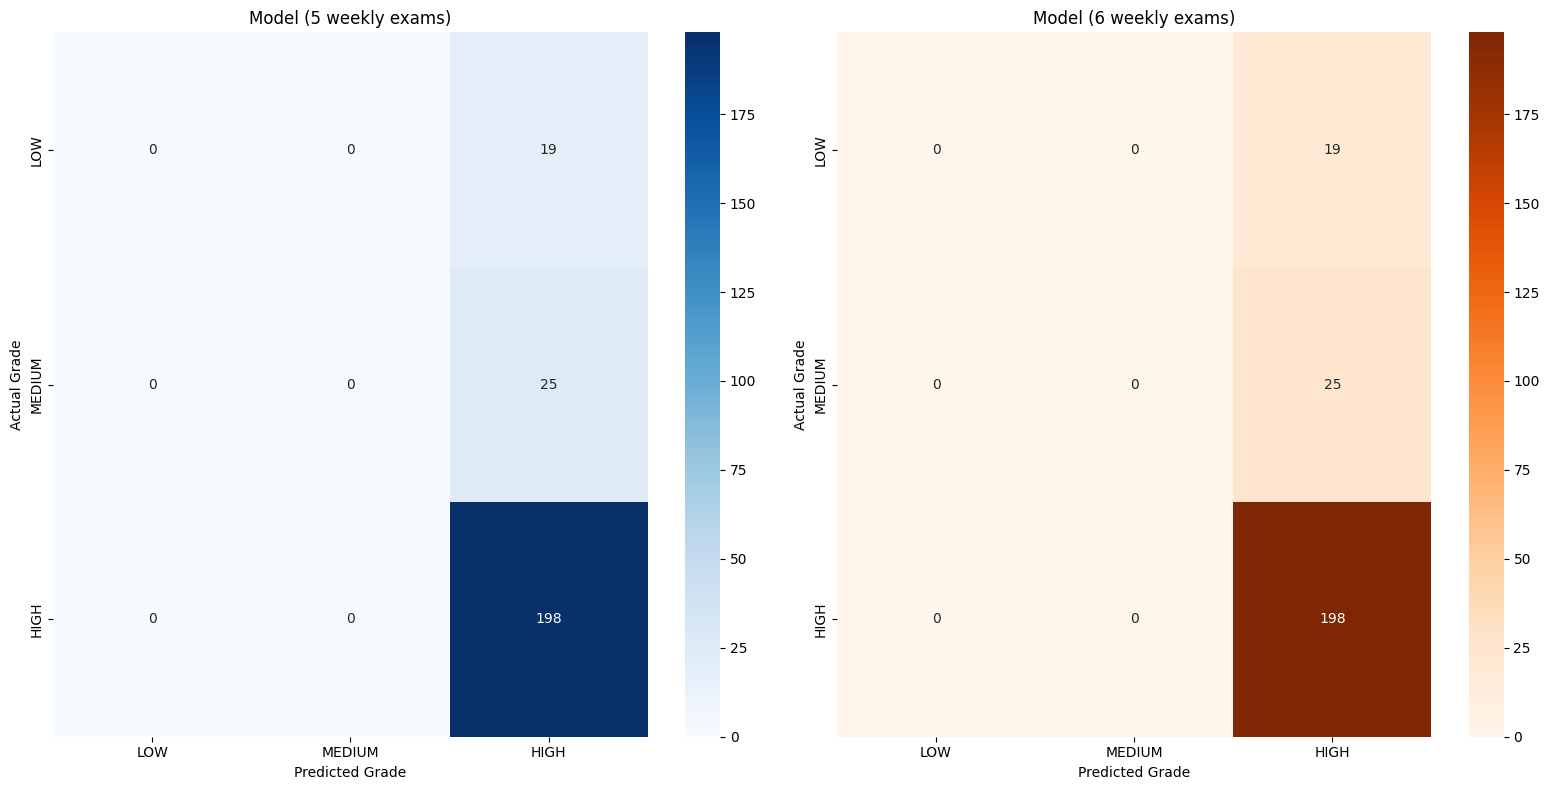

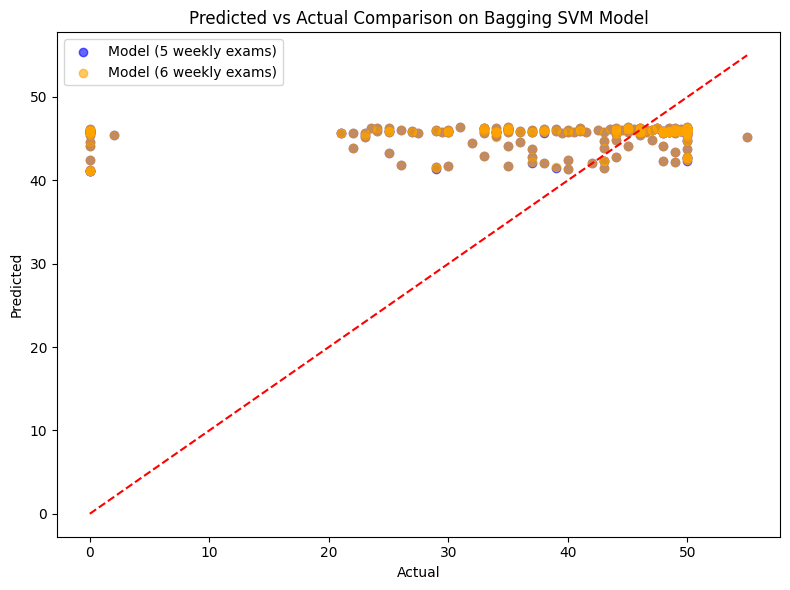

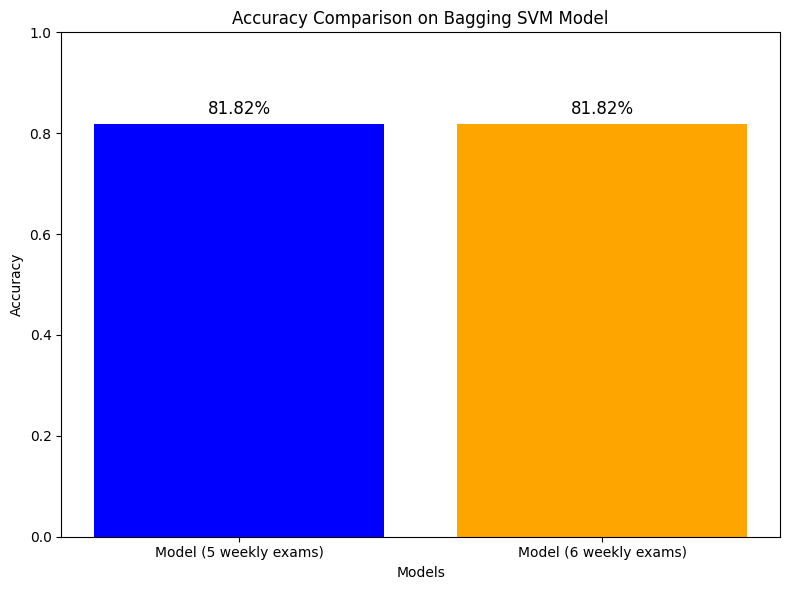

In [ ]:
# Metrics calculation
metrics_five_bagged = calculate_metrics(YFive_test, y_pred_bagged_svm_five)
metrics_six_bagged = calculate_metrics(YSix_test, y_pred_bagged_svm_six)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
svm_bagged_five_values = [metrics_five_bagged["MSE"], metrics_five_bagged["RMSE"], metrics_five_bagged["MAE"], metrics_five_bagged["R2"]]
svm_bagged_six_values = [metrics_six_bagged["MSE"], metrics_six_bagged["RMSE"], metrics_six_bagged["MAE"], metrics_six_bagged["R2"]]

# Plots
generate_metrics_comparison(svm_bagged_five_values, svm_bagged_six_values,"Metrics comparison on Bagging SVM Model")
generate_confusion_matrices(y_pred_bagged_svm_five, y_pred_bagged_svm_six)
generate_predicted_vs_actual_comparison(YFive_test, y_pred_bagged_svm_five, YSix_test, y_pred_bagged_svm_six, "Predicted vs Actual Comparison on Bagging SVM Model")
generate_accuracy_comparison(metrics_five_bagged["Accuracy"], metrics_six_bagged["Accuracy"], "Accuracy Comparison on Bagging SVM Model")

**Stacked Model**

In [ ]:
# Base models for stacking
base_models_five = [
    ('svr', best_svm_five),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

stacked_model_five = StackingRegressor(
    estimators=base_models_five,
    final_estimator=Ridge(alpha=1.0),
    passthrough=True
)

# Fit and predict for 5 exams
stacked_model_five.fit(XFive_train, YFive_train)
y_pred_stacked_five = stacked_model_five.predict(XFive_test)

base_models_six = [
    ('svr', best_svm_six),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

stacked_model_six = StackingRegressor(
    estimators=base_models_six,
    final_estimator=Ridge(alpha=1.0),
    passthrough=True
)

# Fit and predict for 6 exams
stacked_model_six.fit(XSix_train, YSix_train)
y_pred_stacked_six = stacked_model_six.predict(XSix_test)

joblib.dump(stacked_model_six, "stacked_svm.pkl")

['stacked_svm.pkl']

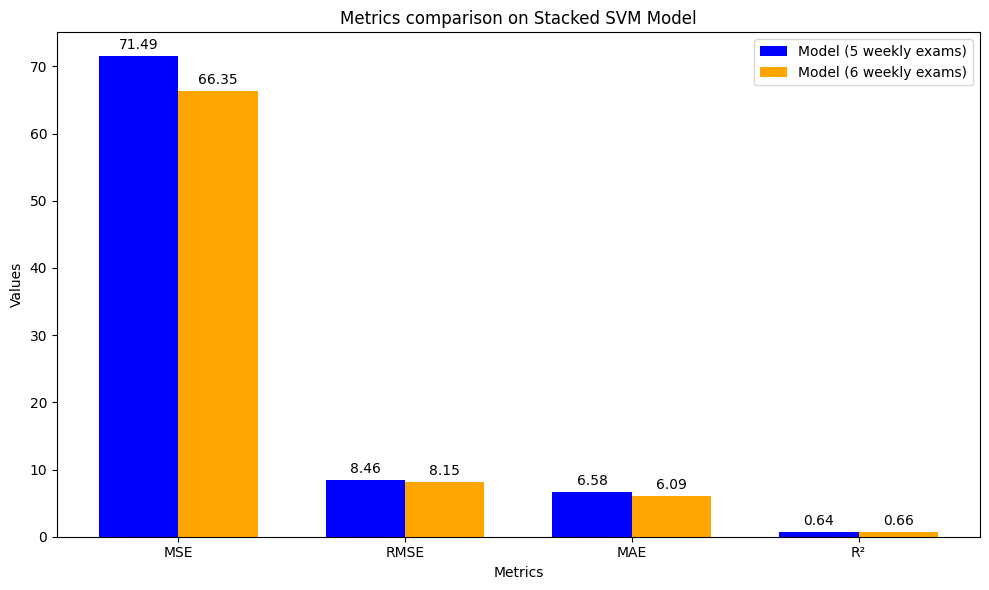

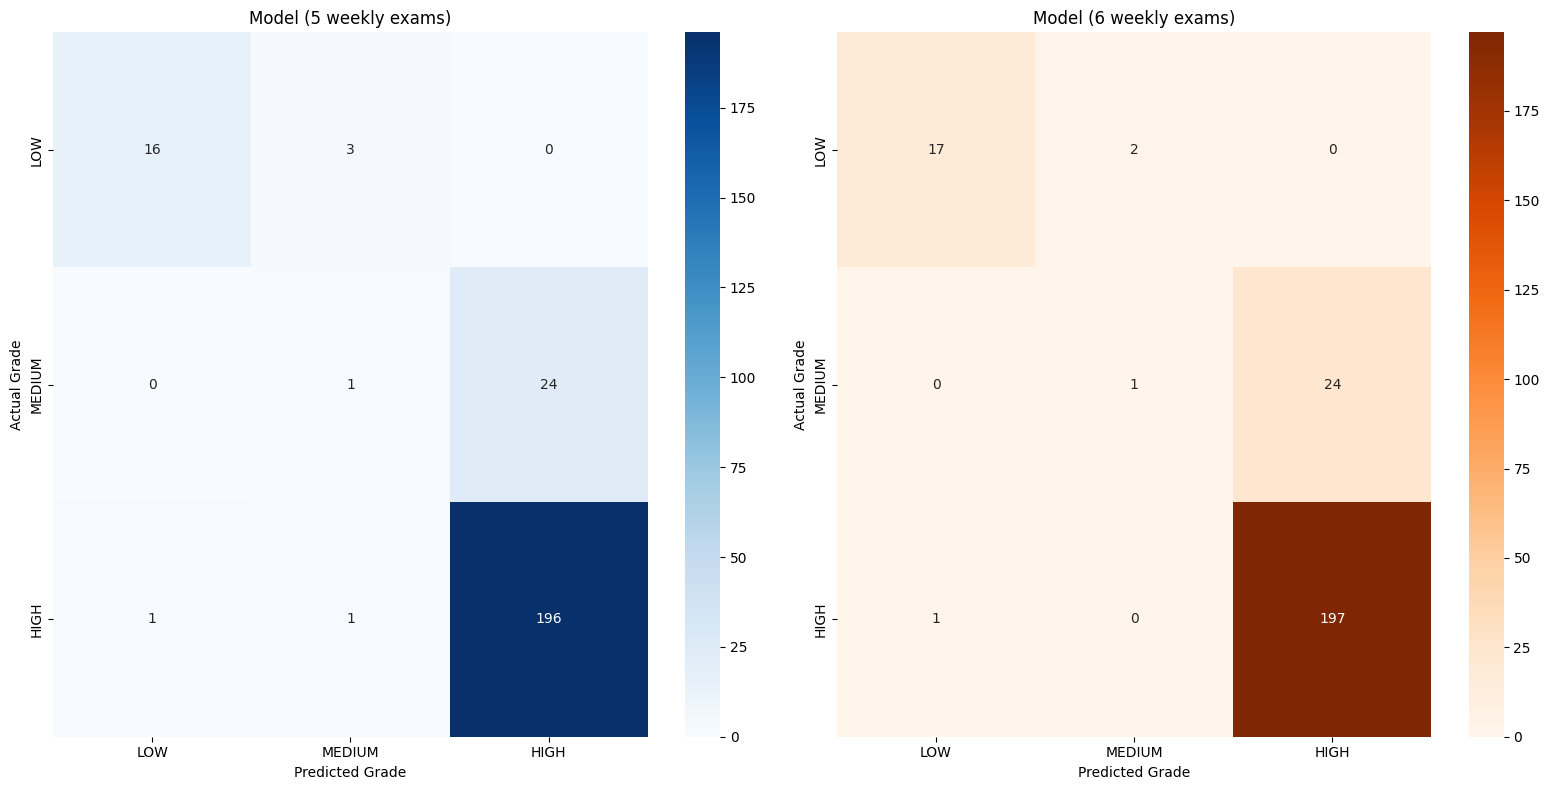

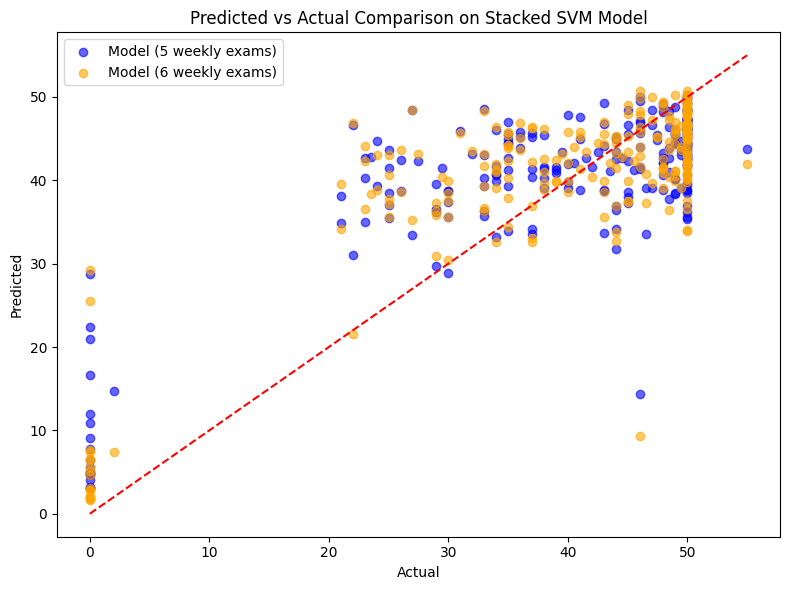

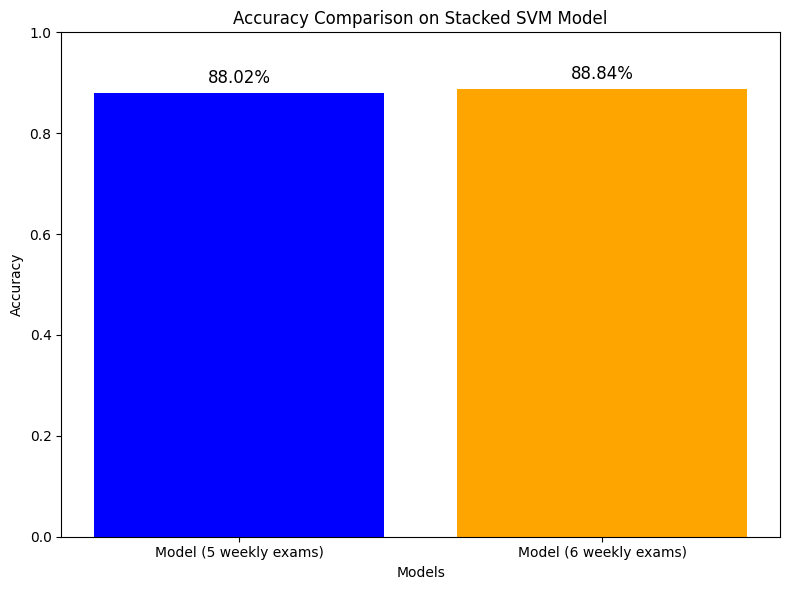

In [ ]:
# Metrics calculation
metrics_five_stacked = calculate_metrics(YFive_test, y_pred_stacked_five)
metrics_six_stacked = calculate_metrics(YSix_test, y_pred_stacked_six)

metrics = ['MSE', 'RMSE', 'MAE', 'R²']

# Values for each model
svm_stacked_five_values = [metrics_five_stacked["MSE"], metrics_five_stacked["RMSE"], metrics_five_stacked["MAE"], metrics_five_stacked["R2"]]
svm_stacked_six_values = [metrics_six_stacked["MSE"], metrics_six_stacked["RMSE"], metrics_six_stacked["MAE"], metrics_six_stacked["R2"]]

# Plots
generate_metrics_comparison(svm_stacked_five_values, svm_stacked_six_values,"Metrics comparison on Stacked SVM Model")
generate_confusion_matrices(y_pred_stacked_five, y_pred_stacked_six)
generate_predicted_vs_actual_comparison(YFive_test, y_pred_stacked_five, YSix_test, y_pred_stacked_six, "Predicted vs Actual Comparison on Stacked SVM Model")
generate_accuracy_comparison(metrics_five_stacked["Accuracy"], metrics_six_stacked["Accuracy"], "Accuracy Comparison on Stacked SVM Model")

**Comparison**

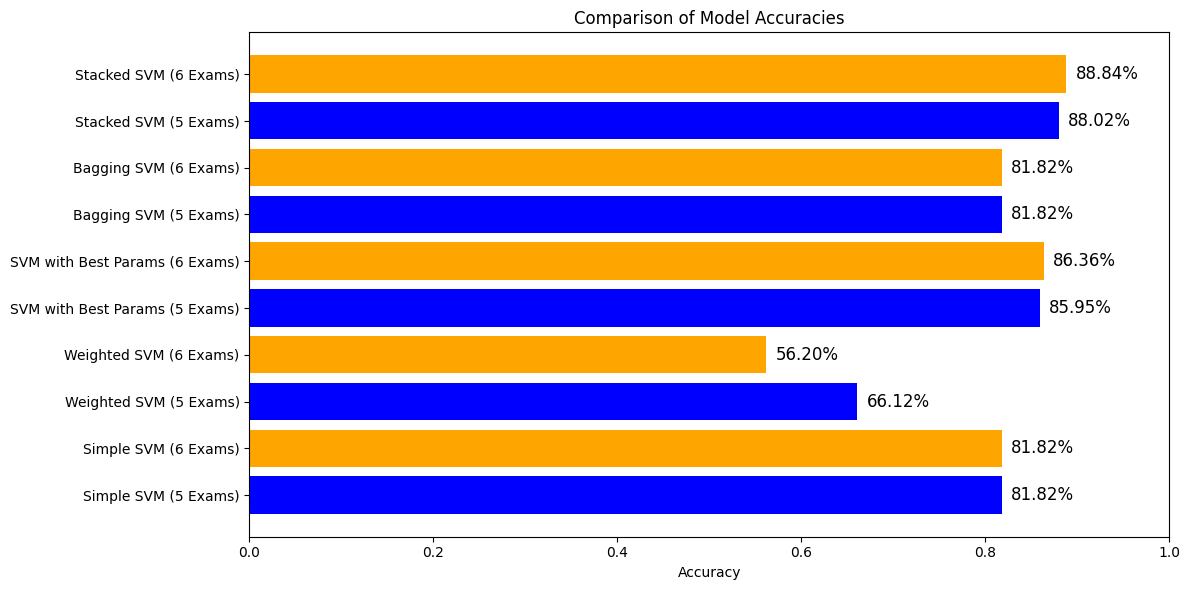

In [ ]:
models = [
    "Simple SVM (5 Exams)", "Simple SVM (6 Exams)",
    "Weighted SVM (5 Exams)", "Weighted SVM (6 Exams)",
    "SVM with Best Params (5 Exams)", "SVM with Best Params (6 Exams)",
    "Bagging SVM (5 Exams)", "Bagging SVM (6 Exams)",
    "Stacked SVM (5 Exams)", "Stacked SVM (6 Exams)"
]

accuracies = [
    metrics_five["Accuracy"], metrics_six["Accuracy"],
    metrics_five_weighted["Accuracy"], metrics_six_weighted["Accuracy"],
    metrics_five_best["Accuracy"], metrics_six_best["Accuracy"],
    metrics_five_bagged["Accuracy"], metrics_six_bagged["Accuracy"],
    metrics_five_stacked["Accuracy"], metrics_six_stacked["Accuracy"]
]

# Plot comparison of all SVM-based model accuracies
plt.figure(figsize=(12, 6))
plt.barh(models, accuracies, color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)

for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.2%}", ha='left', va='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()